### Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

from sklearn.preprocessing import PolynomialFeatures 
from sklearn.model_selection import train_test_split

import statsmodels.api as sm

%matplotlib inline

In [2]:
df = pd.read_excel('Uttar Pradesh.xlsx')

In [3]:
df.head()

,Year,Population,Male,Female
0,1901,46647804,24066836,22580968
1,1911,46012663,24021001,21991662
2,1921,44556427,23347896,21208531
3,1931,47478533,24945773,22532760
4,1941,53920630,28269504,25651126


#### Normalizing the Data

In [4]:
scaler = MinMaxScaler()
df[['Population']] = scaler.fit_transform(df[['Population']])

In [5]:
df1 = df[['Year','Population']]

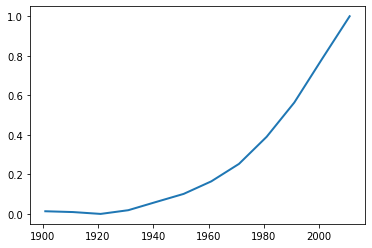

In [6]:
plt.plot(df1['Year'],df1['Population'],linewidth=2.0)

## Prediction on Population

In [7]:
#train-test set creation
X = df1['Year'].values.reshape(-1,1)
y = df1['Population'].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
  
poly = PolynomialFeatures(degree = 4) 
X_poly = poly.fit_transform(X_train) 
X_test = poly.fit_transform(X_test)
  
poly.fit(X_poly, y_train) 
lin2 = LinearRegression() 
lin2.fit(X_poly, y_train)
lin2.score(X_test,y_test)

0.9942566410914522

In [8]:
#training on the whole dataset
X = df1['Year'].values.reshape(-1,1)
y = df1['Population'].values.reshape(-1,1)
from sklearn.preprocessing import PolynomialFeatures 
  
poly = PolynomialFeatures(degree = 4) 
X_poly = poly.fit_transform(X) 
  
poly.fit(X_poly, y) 
lin2 = LinearRegression() 
lin2.fit(X_poly, y) 


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
dfTest = pd.DataFrame({'Year':[2021,2031,2041,2051]})

In [10]:
pred = []
for i in dfTest['Year']:
    pred.append(lin2.predict(poly.fit_transform([[i]]))[0][0])

In [11]:
pred

[1.305752084626647, 1.6519080364653291, 2.0539872514802937, 2.516319176367915]

In [12]:
dfTest['Population'] = pred


In [13]:
df1 = df1.append(dfTest,ignore_index=True)
df1.tail(5)

,Year,Population
11,2011,1.000000
12,2021,1.305752
13,2031,1.651908
14,2041,2.053987
15,2051,2.516319


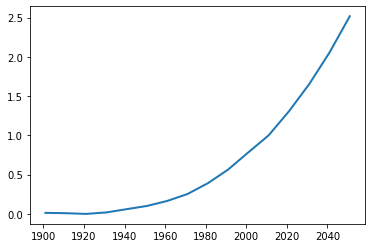

In [14]:
plt.plot(df1['Year'],df1['Population'],linewidth=2.0)


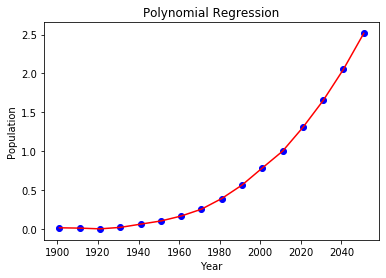

In [15]:
# Visualising the Polynomial Regression results
plt.scatter(df1['Year'], df1['Population'], color = 'blue') 
  
plt.plot(df1['Year'], df1['Population'], color = 'red') 
plt.title('Polynomial Regression') 
plt.xlabel('Year') 
plt.ylabel('Population') 
  
plt.show()

### WRT Unproportioned Scale

In [16]:
pred = []
for i in df1['Population']:
    pred.append(round(scaler.inverse_transform([[i]])[0][0]))

In [17]:
pred

[46647804.0,
 46012663.0,
 44556427.0,
 47478533.0,
 53920630.0,
 60273743.0,
 70143635.0,
 83848797.0,
 105136540.0,
 132061653.0,
 166197921.0,
 199812341.0,
 247282160.0,
 301024919.0,
 363450095.0,
 435229861.0]

In [18]:
df1['Population'] = pred


In [19]:
df1

,Year,Population
0,1901,46647804.0
1,1911,46012663.0
2,1921,44556427.0
3,1931,47478533.0
4,1941,53920630.0
5,1951,60273743.0
6,1961,70143635.0
7,1971,83848797.0
8,1981,105136540.0
9,1991,132061653.0


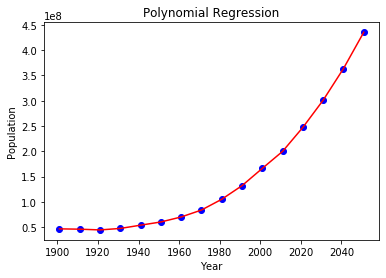

In [20]:
# Visualising the Polynomial Regression results 
plt.scatter(df1['Year'], df1['Population'], color = 'blue') 
  
plt.plot(df1['Year'], df1['Population'], color = 'red') 
plt.title('Polynomial Regression') 
plt.xlabel('Year') 
plt.ylabel('Population') 
  
plt.show() 

### Male Population

In [21]:
scaler = MinMaxScaler()
df[['Male']] = scaler.fit_transform(df[['Male']])

In [22]:
df2 = df[['Year','Male']]
df2

,Year,Male
0,1901,0.008861
1,1911,0.008296
2,1921,0.000000
3,1931,0.019695
4,1941,0.060661
5,1951,0.101488
6,1961,0.165607
7,1971,0.263190
8,1981,0.400749
9,1991,0.579892


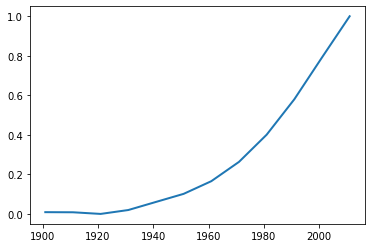

In [23]:
plt.plot(df2['Year'],df2['Male'],linewidth=2.0)


In [24]:
#train-test set creation
X = df1['Year'].values.reshape(-1,1)
y = df1['Population'].values.reshape(-1,1)
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
  
poly = PolynomialFeatures(degree = 4) 
X_poly = poly.fit_transform(X_train) 
X_test = poly.fit_transform(X_test)
  
poly.fit(X_poly, y_train) 
lin2 = LinearRegression() 
lin2.fit(X_poly, y_train)
lin2.score(X_test,y_test)

0.9997693423026122

In [25]:
#training on the whole dataset
X = df2['Year'].values.reshape(-1,1)
y = df2['Male'].values.reshape(-1,1)
from sklearn.preprocessing import PolynomialFeatures 
  
poly = PolynomialFeatures(degree = 4) 
X_poly = poly.fit_transform(X) 
  
poly.fit(X_poly, y) 
lin2 = LinearRegression() 
lin2.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
dfTest = pd.DataFrame({'Year':[2021,2031,2041,2051]})

In [27]:
pred = []
for i in dfTest['Year']:
    pred.append(lin2.predict(poly.fit_transform([[i]]))[0][0])

In [28]:
pred

[1.3002706200709326, 1.634459823697398, 2.0202521174301182, 2.461405234729682]

In [29]:
dfTest['Male'] = pred

In [30]:
df2 = df2.append(dfTest,ignore_index=True)
df2

,Year,Male
0,1901,0.008861
1,1911,0.008296
2,1921,0.000000
3,1931,0.019695
4,1941,0.060661
5,1951,0.101488
6,1961,0.165607
7,1971,0.263190
8,1981,0.400749
9,1991,0.579892


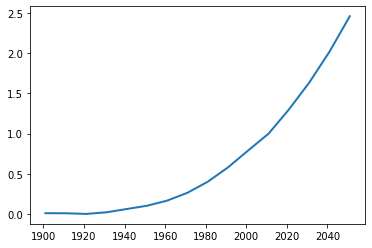

In [31]:
plt.plot(df2['Year'],df2['Male'],linewidth=2.0)

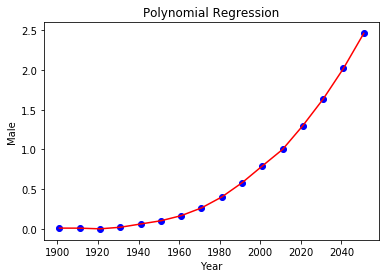

In [32]:
plt.scatter(df2['Year'], df2['Male'], color = 'blue') 
  
plt.plot(df2['Year'], df2['Male'], color = 'red') 
plt.title('Polynomial Regression') 
plt.xlabel('Year') 
plt.ylabel('Male') 
  
plt.show()

#### WRT UNSCALED MALE

In [33]:
pred = []
for i in df2['Male']:
    pred.append(round(scaler.inverse_transform([[i]])[0][0]))

In [34]:
pred

[24066836.0,
 24021001.0,
 23347896.0,
 24945773.0,
 28269504.0,
 31581889.0,
 36784048.0,
 44701182.0,
 55861688.0,
 70396062.0,
 87565369.0,
 104480510.0,
 128842250.0,
 155955894.0,
 187256231.0,
 223048137.0]

In [35]:
df2['Male'] = pred
df2

,Year,Male
0,1901,24066836.0
1,1911,24021001.0
2,1921,23347896.0
3,1931,24945773.0
4,1941,28269504.0
5,1951,31581889.0
6,1961,36784048.0
7,1971,44701182.0
8,1981,55861688.0
9,1991,70396062.0


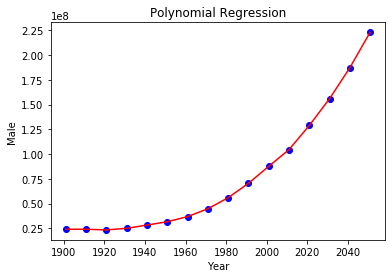

In [36]:
# Visualising the Polynomial Regression results 
plt.scatter(df2['Year'], df2['Male'], color = 'blue') 
  
plt.plot(df2['Year'], df2['Male'], color = 'red') 
plt.title('Polynomial Regression') 
plt.xlabel('Year') 
plt.ylabel('Male') 
  
plt.show()

### Female Population

In [37]:
scaler = MinMaxScaler()
df[['Female']] = scaler.fit_transform(df[['Female']])

In [38]:
df3 = df[['Year','Female']]
df3.head()

,Year,Female
0,1901,0.018516
1,1911,0.010565
2,1921,0.000000
3,1931,0.017865
4,1941,0.059935


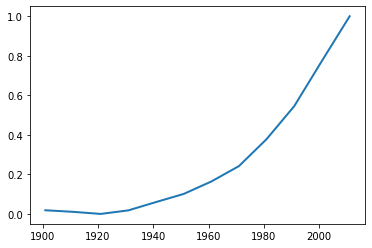

In [39]:
plt.plot(df3['Year'],df3['Female'],linewidth=2.0)

In [40]:
#train-test set creation
X = df3['Year'].values.reshape(-1,1)
y = df3['Female'].values.reshape(-1,1)
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
  
poly = PolynomialFeatures(degree = 4) 
X_poly = poly.fit_transform(X_train) 
X_test = poly.fit_transform(X_test)
  
poly.fit(X_poly, y_train) 
lin2 = LinearRegression() 
lin2.fit(X_poly, y_train)
lin2.score(X_test,y_test)

0.9961386374682194

In [41]:
#train on whole dataset
X = df3['Year'].values.reshape(-1,1)
y = df3['Female'].values.reshape(-1,1)
from sklearn.preprocessing import PolynomialFeatures 
  
poly = PolynomialFeatures(degree = 4) 
X_poly = poly.fit_transform(X) 
  
poly.fit(X_poly, y) 
lin2 = LinearRegression() 
lin2.fit(X_poly, y) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [42]:
dfTest = pd.DataFrame({'Year':[2021,2031,2041,2051]})

In [43]:
pred = []
for i in dfTest['Year']:
    pred.append(lin2.predict(poly.fit_transform([[i]]))[0][0])

In [44]:
pred

[1.311751892002576, 1.6710062023803403, 2.0909124770760172, 2.576425938897046]

In [45]:
dfTest['Female'] = pred

In [46]:
df3 = df3.append(dfTest,ignore_index=True)
df3.tail(5)

,Year,Female
11,2011,1.000000
12,2021,1.311752
13,2031,1.671006
14,2041,2.090912
15,2051,2.576426


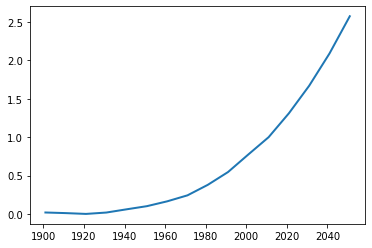

In [47]:
plt.plot(df3['Year'],df3['Female'],linewidth=2.0)

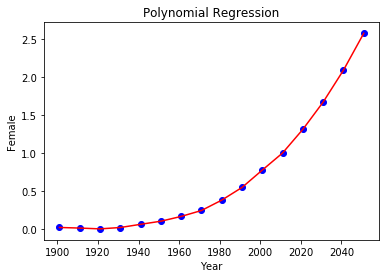

In [48]:
# Visualising the Polynomial Regression results 
plt.scatter(df3['Year'], df3['Female'], color = 'blue') 
  
plt.plot(df3['Year'], df3['Female'], color = 'red') 
plt.title('Polynomial Regression') 
plt.xlabel('Year') 
plt.ylabel('Female') 
  
plt.show() 

# WRT Unscaled Population

In [49]:
pred = []
for i in df3['Female']:
    pred.append(round(scaler.inverse_transform([[i]])[0][0]))

In [50]:
pred

[22580968.0,
 21991662.0,
 21208531.0,
 22532760.0,
 25651126.0,
 28691854.0,
 33359587.0,
 39147615.0,
 49274852.0,
 61665591.0,
 78632552.0,
 95331831.0,
 118439910.0,
 145069025.0,
 176193864.0,
 212181724.0]

In [51]:
df3['Female'] = pred

In [52]:
df3

,Year,Female
0,1901,22580968.0
1,1911,21991662.0
2,1921,21208531.0
3,1931,22532760.0
4,1941,25651126.0
5,1951,28691854.0
6,1961,33359587.0
7,1971,39147615.0
8,1981,49274852.0
9,1991,61665591.0


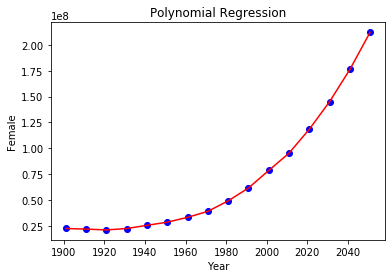

In [53]:
# Visualising the Polynomial Regression results 
plt.scatter(df3['Year'], df3['Female'], color = 'blue') 
  
plt.plot(df3['Year'], df3['Female'], color = 'red') 
plt.title('Polynomial Regression') 
plt.xlabel('Year') 
plt.ylabel('Female') 
  
plt.show() 

In [54]:
df4 = pd.concat([df1,df2,df3], axis =1)

In [55]:
df4

,Year,Population,Year,Male,Year,Female
0,1901,46647804.0,1901,24066836.0,1901,22580968.0
1,1911,46012663.0,1911,24021001.0,1911,21991662.0
2,1921,44556427.0,1921,23347896.0,1921,21208531.0
3,1931,47478533.0,1931,24945773.0,1931,22532760.0
4,1941,53920630.0,1941,28269504.0,1941,25651126.0
5,1951,60273743.0,1951,31581889.0,1951,28691854.0
6,1961,70143635.0,1961,36784048.0,1961,33359587.0
7,1971,83848797.0,1971,44701182.0,1971,39147615.0
8,1981,105136540.0,1981,55861688.0,1981,49274852.0
9,1991,132061653.0,1991,70396062.0,1991,61665591.0
